<div style="text-align: center;">
  <h1>
        <center>Credit Card Fraud Detection</center>
    </h1>
        <center>Conference Project for Bio-Inspired Artificial Intelligence Class</center>
</div>

<br>

<div style="text-align: center;">
    <div style="display: inline-block; text-align: center">
        Sarah Lawrence College - May, 2017<br/>
        Student: Alexander Jermann<br/>
        Supervisor: Dr. Prof. James Marshall
    </div>
</div>

## Introduction

For my conference paper I applied different machine learning algorithms to a record of real-world credit card transactions which were labeled as 'normal' or 'fraudulent', to see if I could create a program that could learn to predict if a credit card transaction is being used by somebody who is not the cardholder. I specifically focused on how well the program could prevent fraudulent transactions from happening, by training a program for that. The motivation for such a program becomes evident when we look at statistics of credit card fraud. In the past five years, 42% of Americans have experienced credit card fraud (The Nielson Report, 2013). If we look at the graph, we see that in 2003 credit card fraud was \$ 3.8 billion USD while in 2012 it was \$ 11.3 billion, which is a significant increase. From 2011 to 2012 the amount increase 15% (ibid.).

<img src="images/fraud.png" alt="Credit Card Fraud from 2003 - 2012" style="width: 200px;"/>

**Note on Notebook:** When opening this notebook as Jupyter Notebook (.ipynb), there are two main types of 'cells' (or Text Fields) in this iPython Notebook: Code and Markdown text. The code cells are executable like in an iPython terminal window with the command `shift return`. To run all the code, one can either restart the kernel in the kernel dropdown, or in the cell dropdown menu 'run all' (for more instructions on notebook see link section at bottom of the document)

**Prerequisites:**
* Dataset: `creditcard.csv`
* Libraries: `Pandas, Numpy, Matplotlib, Sklearn, CONX`
* Files: `confusion_matrix.py, plot_mlp_training_curves.py`
* Folders: `images`

All prerequisites on: http://jermann.io/credit-card-fraud/prereq.zip

## Importing Libraries & Dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve,recall_score, classification_report 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [76]:
from __future__  import division

First, we're going to import the CSV file using pandas dataframe object. We can think of a dataframe object as being like a spreadsheet or SQL table. It consists of rows and columns with added functionalities.

In [77]:
data = pd.read_csv("creditcard.csv")

## Exploring Dataset

As a first step, we want to explore the dataset. In order to do that without filling the whole page, we can append the "`.head()`" command to show the first five rows only out of 284'807 total rows.

In [78]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We see that each row represents a transaction and that dataset contains 31 columns (for time + 28 data variables + amount + class). The first transaction represent time $t=0$ and every transaction after that is labeled with the time in seconds elapsed from the first transaction. The 28 Variables ($V1,V2,...,V28$) are the result of a principle component analysis ("PCA") done on the original dataset, implying that the original dataset might have been even higher-dimensional. The PCA was applied in order to anonymize the data and in probably to reduce the size of the dataset as well. Currently the dataset in 68.1 MB. The *amount* column pretty straightforward represents the monetary value transfered. The *class* stands for classification, where $0$ is the label for *normal* and $1$ for *fraudulent* in the class column. All transactions were collected and analyzed by the Worldline and the Machine Learning Group of Université Libre de Bruxelles ("ULB") on big data mining and fraud detection and represent transaction from European Cardholders collected during two days in September of 2013. 

As a second step, we want to see how many fraudulent transactions there are in the dataset and how many normal transactions there are. We do that by using a pandas object that counts how many elements of each element-type (in this case one or zero) and then sorts them into its corresponding category. 

In [79]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
a = count_classes[1]
b = count_classes[0]
print 'Normal: %5d' % b
print 'Fraud: %9d' % a
print 'Percentage of Fraudulent transactions: %.3f%%' % (100.0 * a/b)

Normal:   492
Fraud:    284315
Percentage of Fraudulent transactions: 0.173%


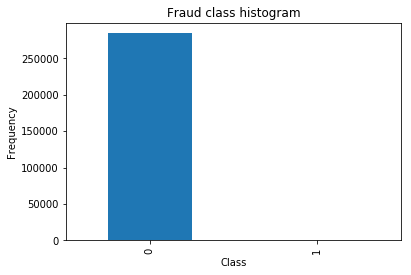

In [80]:
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

As we see above the dataset is extremely unbalanced. 492 transactions are fraudulent out of a total of 284'807 transaction, meaning that the positive class (frauds) only account for 0.173% of all transactions. This has huge implications when trying to train a network (see chapter: Difficulties).


## Approach


#### Resample Dataset
In order to successfully train a neural network or use other forms of machine learning algorithms, we need to find a way to balance the dataset. In data science there are three main ways to do this, following the basic principle of building a new dataset by randomly selecting a balanced amount of valid and fraudulent transactions:

1. **OVER-sample:** In a *over-sampling* approach the idea is to add copies of the under-represented or minority class to the dataset, either by directly creating duplicates or through creating synthetic copies using a given algorithm. It is called *over-sampling* because we are essentially creating a larger dataset. This method is traditionally used when there is little data.


2. **UNDER-sample:** In a *under-sampling* approach the idea is to count the amount of instances in the minority class, and the randomly choose the same amount from the over-represented class, to form a new dataset. It is called *under-sampling* because the new dataset is smaller than the original dataset. This method is traditionally used when there is a lot of data.


3.  **SMOTE (Synthetic Minority Over-Sampling Technique):** SMOTE is a combination of both OVER- and UNDER-sampling. The OVER-sampling part does not replicate the minority class but builds new instances using an algorithm

Given the composition of our dataset we will use the under-sampling technique to build a new dataset.

## Prepare Datasets

In order to use a neural network or other machine learning algorithms we need to standardize the data to unit variance by removing the mean. We use `.fit_transform` as a method of `StandardScaler()` to first fit the *amount* column to the rest of the data and then to return the transformed data into the new column called *normAmount*. We use the numpy `.reshape` object to transform the pandas dataframe object into a numpy array of 284807 rows and 1 column. To index the last element in the column we can also use -1, which is why we could enter `.reshape(-1,1)`. After that we delete the old *amount* column.

In [81]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 1. Unbalanced Dataset

We'll start building the **first dataset** by creating two new dataframes and 'splitting' the data into 'Class' column (which contains the data on whether a transaction is fraudulent or normal) and into everything else, meaning the 28 anonymized instances + amount + time. This is done to prepare the dataset for training later where the variable "y" would be the list of targets and "X" would be the list of patterns. We do that by using `.ix` command from the pandas library, which is a label based indexer. The ":" sign is an indexing parameter and represents all rows.

In [82]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

### 2. Under-sampled Dataset

In order to build the under-sampled dataset as outlined above, we start by counting the amount of fraudulent transactions. We now create two variables containing indices, one made out of the indices corresponding to fraudulent transactions and one corresponding to normal transactions. We do that by using the ".index" command from the pandas library, which creates a list indices corresponding to given rows and columns in the pandas 'dataframe'. We directly convert the fraud indices into a numpy array. To create a balanced dataset we use the `np.random.choice()` function to randomly choose the same number of transactions as the fraudulent transaction from the normal transactions. We call this `random_normal_indices` which we then also transform into a numpy array.

In [83]:
amount_fraud = len(data[data.Class == 1])

fraud_indices = np.array(data[data.Class == 1].index) 
normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, amount_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

Now that we have the indices to all fraudulent transactions and the indices to the same amount or randomly chosen normal transactions, we can concatenate them into a single array. Using the concatenated indices we can build the under-sampled dataset using the ".iloc" command from the pandas library and is an integer-based indexer. We attach the command to our original dataframe to create the `under_sample_data` dataframe.

In [84]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]

Now we build the **second dataset** by splitting the dataset into patterns and targets. As a final step we make sure the dataset is in fact balanced by printing out the ratios.

In [85]:
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

In [86]:
print "Percentage of normal transactions: %s" % (len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print "Percentage of fraud transactions: %s" % (len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print "Total number of transactions in resampled data: %s" % (len(under_sample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data: 984


## Split Dataset into Training and Testing sets

In order to implement supervised learning algorithms, we need to split the dataset into a training and a testing dataset. We are going to use SciKitLearn helper function to sample a training set while holding back 30% for testing at the end for both, the 'Unbalanced (whole) Dataset' and the 'Under-sampled Dataset'. This is done in order to evaluate how well the trained machine learning algorithm can classify transactions it has not seen before. 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [88]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

We will now use to machine learning algorithms to classify the data. 
1. Neural Network (Multi-Layer Perceptron with Backpropagation)
2. Logistic Regression

## 1. Neural Network 

In [89]:
print 'Number of Input units: %s' % len(X_train_un.iloc[1,:])

Number of Input units: 29


In [90]:
len(X_train_un)

688

Before we can create a Neural Network we need to transform the training targets "`y_train_un`" into a one-dimensional numpy array. To do that we use the numpy function `ravel` to flatten. We then create a `MLPClassifier`, which stands for Multi-Layer Perceptron Classifier. In doing that, we set the following parameters:

#### Network Configuration
* Input: 29 Units
* Hidden Layers
    1. Hidden layer: 18 units
    2. Hidden layer: 12 units
    3. Hidden layer: 8 units
* Output: 1 Unit
* Momentum: 0.9
* Learning rate: 0.001
* Tolerance: 0.0001 (low number important on dataset like this)

#### Activation
We set the activation function for the hidden layers to `logistic`, which uses the logistic sigmoid function and returns:

$f(x) = \frac{1}{1 + exp(-x)}$

This activation function works especially well in a binary classification problem (as we will see in section 2 as well). It allows for the hidden units to take values on the continuous scale between 0 and 1. To optimize the error we use a so-called "Limited-memory BFGS algorithm". It is an iterative numerical optimization algorithm that uses quasi-Newtonian methods to find a local maxima or minima in a searchspace. It is a form of hill climbing algorithm and is very fast and efficient for this purpose. 

In [91]:
y_train_un_1d = np.ravel(y_train_un)

In [92]:
n = MLPClassifier(hidden_layer_sizes=(18,12,8), activation='logistic', solver='lbfgs')

To train the network we use the `.fit()` function

In [180]:
n.fit(X_train_un, y_train_un_1d)
print 'Total Training Epochs: %s' % n.n_iter_
print 'Mean Accuracy of Prediction: %.3f%%' % (100.0 * n.score(X_test_un, y_test_un))

Total Training Epochs: 202
Mean Accuracy of Prediction: 91.216%


Now we compare it to different stochastic learning algorithms to compare the performance.

### Comparing Parameters for MLPClassifier


Compare Stochastic learning strategies for MLPClassifier

This example visualizes some training loss curves for different stochastic
learning strategies, including SGD and Adam. Because of time-constraints, we
use several small datasets, for which L-BFGS might be more suitable. The
general trend shown in these examples seems to carry over to larger datasets,
however.

Note that those results can be highly dependent on the value of
``learning_rate_init``.


learning on dataset credit
Parameters: Constant Learning-Rate
Training set score: 0.8372
Training set loss:  0.3280 

Parameters: Constant with Momentum
Training set score: 0.9288
Training set loss:  0.4121 

Parameters: Constant with Nesterov's Momentum
Training set score: 0.9230
Training set loss:  0.1973 

Parameters: Inv-Scaling with Momentum
Training set score: 0.8212
Training set loss:  0.4287 

Parameters: Adam
Training set score: 0.9317
Training set loss:  0.1987 

Parameters: Original
Training set score: 0.9549
Training set

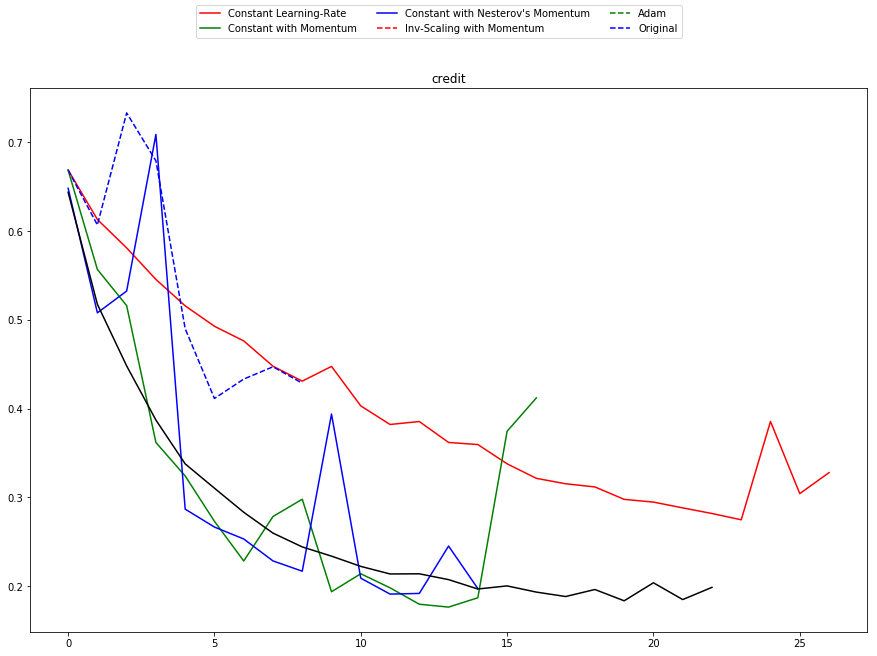

In [158]:
%load plot_mlp_training_curves.py

We see that the solver 'Adam' looks very promising (the black line on the graph). So as a next step we are going to implement it and see if truly performs better.

In [183]:
adam = MLPClassifier(activation='logistic', solver='adam', learning_rate_init = 0.001, max_iter=300)

In [184]:
adam.fit(X_train_un, y_train_un_1d)
print 'Total Training Epochs: %s' % adam.n_iter_
print 'Mean Accuracy of Prediction: %.3f%%' % (100.0 * adam.score(X_test_un, y_test_un))

Total Training Epochs: 200
Mean Accuracy of Prediction: 92.568%


## Results 

Now that we trained the network on the training data, we can see hwo the network performs on the testing data. To do that we use a sklearn function called predict. We start by testing the performance on the under-sampled testing data, and as a second step on the whole dataset.

### 1. Under-sampled Dataset

The `.predict()` function takes a set of patterns and then calculates the outputs using the trained network, which is of course why it is called predicting. In a real world scenario, we could take a transaction run it through the `.predict()` function to predict if the transaction is fraudulent or not.

In [95]:
y_pred_un = n.predict(X_test_un)

To evaluate how well the network performs on data it has never seen, we can compare how many times it predicts the output (or 'labels') correctly. We can do this because we have the true labels stored as well. To visualize this comparison we can use a so-called confusion matrix.  

![alt text](images/confusion_matrix_1.png "Confusion Matrix Example")

In [ ]:
%load confusion_matrix

### Confusion Matrix

Confusion Matrices are especially useful to visualize how well a algorithm predicts a binary outcome, which we know the result of. This is know as a classification problem (or classifier). If we look at the confusion matrix below, we see that the vertical axis is labeled with 'True label' and the horizontal axis with 'Predicted label'. The 'True label' represents the actual classification (Normal, Fraudulent), which we know to be true. The 'Predicted label' represents what the network predicted the classification to be without knowing the actual classification but instead using its 'knowledge' it trained on the training dataset. The smaller squares, represent the intersections of the labeled data. For example, if a transaction gets predicted to be normal (Predicted label: Normal), but is actually fraud (True label: Fraud), it will appear in the bottom left box. Following the logic we want as many transactions as possible to be in the top left or bottom right box or in other words be classified correctly. In the case of credit card fraud detection, we can make the general statement that it is better to predict a fraudulent transaction, that is actually normal, then the other way around (Predict: Normal, True: Fraud), because while the prior is annoying for the customer to be denied a transaction, the latter is actually a criminal activity. There is a special terminology for each case:

* True Positives (TP)
* True Negatives (TN)
* False Positives (FP)
* Falso Negatives (FN)

In order to plot a confusion matrix we use a the confusion matrix function from SKlearn metrics library, which we then plot using matplotlib.

In [98]:
cnf_matrix = confusion_matrix(y_test_un, y_pred_un)

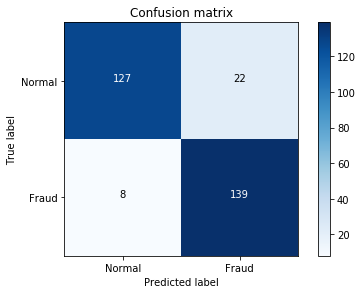

Recall metric in the Testing Dataset: 94.558%
Undetected Fraudulent Transactions: 5.755%


In [189]:
class_names = ['Normal','Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()
print "NN Score: %.3f%%" % (100.0*(n.score(X_test, y_test)))
print "Recall metric in the Testing Dataset: %.3f%%" % (100.0 * (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print "Undetected Fraudulent Transactions: %.3f%%" % (100.0 * (cnf_matrix[1,0]/cnf_matrix[1,1]))

As we can see those are very good metrics. Only around 6% of the fraudulent transactions go undetected in the under-sampled dataset. We can now use the same trained network and see how it performs on the whole dataset.

### 2. Whole Dataset

In [191]:
y_pred = n.predict(X_test)

In [192]:
cnf_matrix = confusion_matrix(y_test, y_pred)

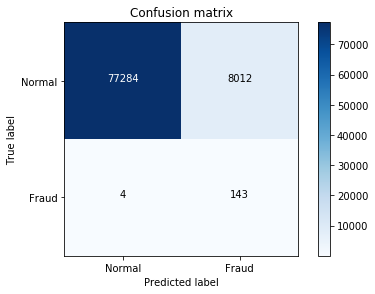

Recall metric in the Testing Dataset: 97.279%
Undetected Fraudulent Transactions: 2.797%


In [193]:
class_names = ['Normal','Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()
print "NN Score: %.3f%%" % (100.0*(n.score(X_test, y_test)))
print "Recall metric in the Testing Dataset: %.3f%%" % (100.0 * (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print "Undetected Fraudulent Transactions: %.3f%%" % (100.0 * (cnf_matrix[1,0]/cnf_matrix[1,1]))

Over the entire dataset the network performed even better. Only 3% of the fraudulent transaction went undetected and the recall metric is at an impressive 97%, especially taking into consideration that there are 85'443 unique transactions in the dataset. This is by far the best result, which is almost too good to be true.

## 2. Logistic Regression

For the classification problem at hand, linear regression is not the right approach as it will give too much weight to data far away from the decision frontier. This can be solved with a logistic regression approach, which uses the sigmoid function. The C parameter controls the amount of 'regularization' in the logistic regression. 

![alt text](images/parameter.png "Regularization")

It is thus important to figure out what C parameter to use, as it is the only adjustable variable in this approach. To do that we make use of a cross validation method called 'K-Fold'. What we do is we divide the training dataset into $K$ sections, and then we train for each $k = 1,2,...,K$ over $K-1$ sections and use the remaining $K^{th}$ section for validation. We then average the error (or in our case we use the recall score) to obtain a measure for the performance of the C parameter.

In [209]:
k = 5.0
total = 0.0
best = 0.0
best_c = 0.0
c = [0.001, 0.01, 0.1, 1., 10., 100.]
fold = KFold(len(y_train_un),k,shuffle=False)
for i in c:
    print 'Parameter C = %s:' % i
    recall_accs = []
    for iteration, indices in enumerate(fold,start=1):
        lr = LogisticRegression(C=i, penalty='l1')
        lr.fit(X_train_un.iloc[indices[0],:],y_train_un.iloc[indices[0],:].values.ravel())
        y_pred_undersample_lr = lr.predict(X_train_un.iloc[indices[1],:].values)
        recall_acc = recall_score(y_train_un.iloc[indices[1],:].values,y_pred_undersample_lr)
        recall_accs.append(recall_acc)
        print 'Iteration %s : recall score = %s' % (iteration, recall_acc)
    mean = sum(recall_accs)/k
    if mean > best:
        best = mean
        best_c = i
    print 'Mean recall score = %s\n' % mean
print 'Best mean recall score = %s, Best C = %s' % (best, best_c)

Parameter C = 0.001:
Iteration 1 : recall score = 0.0
Iteration 2 : recall score = 0.0
Iteration 3 : recall score = 0.71186440678
Iteration 4 : recall score = 0.0
Iteration 5 : recall score = 0.0
Mean recall score = 0.142372881356

Parameter C = 0.01:
Iteration 1 : recall score = 0.931506849315
Iteration 2 : recall score = 0.917808219178
Iteration 3 : recall score = 1.0
Iteration 4 : recall score = 0.972972972973
Iteration 5 : recall score = 0.939393939394
Mean recall score = 0.952336396172

Parameter C = 0.1:
Iteration 1 : recall score = 0.849315068493
Iteration 2 : recall score = 0.86301369863
Iteration 3 : recall score = 0.915254237288
Iteration 4 : recall score = 0.932432432432
Iteration 5 : recall score = 0.878787878788
Mean recall score = 0.887760663126

Parameter C = 1.0:
Iteration 1 : recall score = 0.849315068493
Iteration 2 : recall score = 0.890410958904
Iteration 3 : recall score = 0.966101694915
Iteration 4 : recall score = 0.945945945946
Iteration 5 : recall score = 0.893

Now that we know the best C parameter for the Logistic Regression we can apply it to the confusion matrix to measure its performance.

### Logistic Regression Confusion Matrix Under-sampled data

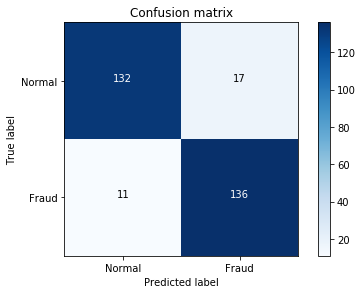

Recall metric in the Testing Dataset: 92.517%
Undetected Fraudulent Transactions: 8.088%


In [212]:
# Set-Up Logistic Regression
lr = LogisticRegression(C = 0.01, penalty = 'l1')

# Train Logistic Regression
lr.fit(X_train_un,y_train_un.values.ravel())

# Predict labels on Under-sampled Dataset
y_pred_un_lr = lr.predict(X_test_un.values)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_un, y_pred_un_lr)
np.set_printoptions(precision=2)

# Plot confusion matrix
class_names = ['Normal','Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Print statistics
print "LR Score: %.3f%%" % (100.0*(lr.score(X_test, y_test)))
print "Recall metric in the Testing Dataset: %.3f%%" % (100.0 * (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print "Undetected Fraudulent Transactions: %.3f%%" % (100.0 * (cnf_matrix[1,0]/cnf_matrix[1,1]))

The LR score returns the Mean accuracy of `lr.predict(X_test_un)` with respect to `y_test_un`.
We now do the same as we did with the neural network, we apply the network on the whole dataset to test its performance.

### Logistic Regression Confusion Matrix Whole data

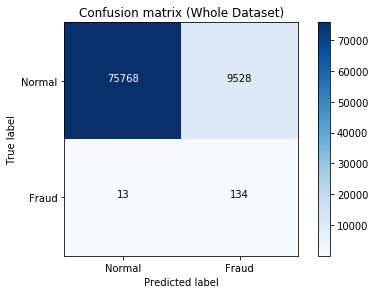

LR Score: 88.833%
Recall metric in the Testing Dataset: 91.156%
Undetected Fraudulent Transactions: 9.701%


In [218]:
# Predict labels on Whole Dataset
y_pred_lr = lr.predict(X_test.values)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['Normal','Fraud']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix (Whole Dataset)')
plt.show()

# Print statistics
print "LR Score: %.3f%%" % (100.0*(lr.score(X_test, y_test)))
print "Recall metric in the Testing Dataset: %.3f%%" % (100.0 * (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print "Undetected Fraudulent Transactions: %.3f%%" % (100.0 * (cnf_matrix[1,0]/cnf_matrix[1,1]))

### Plot Logistic Regression

A useful metric for logistic regression is the so-called Receiver Operating Characteristic (ROC) curve. The y-axis represents the True Positive TP (sensitivity) rate and the x-axis represents the False Positive FP (1 – specificity) rate.

* Sensitivity = TP/(TP + FN) = TP/PP = the ability of the test to detect fraudulent transactions in a dataset with fraudulent transactions.
* Specificity = TN/(TN + FP) = TN / NP = the ability of the test to correctly rule out the fraudulent transactions in a fraudulent free dataset.

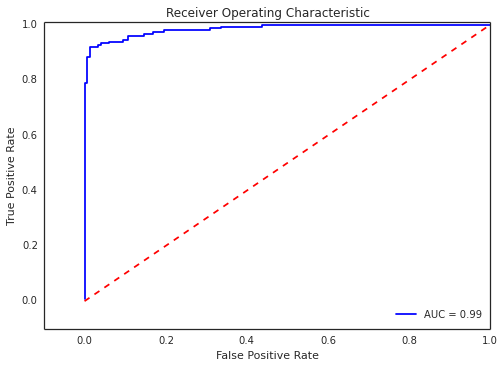

In [278]:
# ROC CURVE
lr = LogisticRegression(C = 100, penalty = 'l1')
y_pred_un_score = lr.fit(X_train_un,y_train_un.values.ravel()).decision_function(X_test_un.values)

fpr, tpr, thresholds = roc_curve(y_test_un.values.ravel(),y_pred_un_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The graph shows that the Logistic Regression got applied in an excellent manner, because the blue line increases in the True Positive rate very quickly and only very late starts to asymptotically increase in the False Positive rate. This graph can be used to to select a threshold for a classifier which maximizes the true positives, while minimizing the false positives. However, different types of problems have different optimal classifier thresholds.

# Conclusion

## Results

When I first ran both supervised machine learning algorithms (MLPClassifier & Logistic Regression), the logistic regression algorithm performed significantly better. In my initial result the MLPClassifier did not detect 17.6% of the fraudulent transactions, which is good considering that 4 out of 5 get detected, but not as good as it could be. The logistic regression approach however performed a lot better. Only 9.7% of the fraudulent transactions went undetected, meaning that 9 in 10 fraudulent transaction got classified correctly. This is a significant increase in predictability. The mean accuracy of `lr.predict()` however was only 88.8%. But much to my surprise I achieved the best performance, by using the `MLPClassifier` again. The first time I trained it, it only took 4 epochs to be trained, which was extremely low. But for my best result, it took the network 203 epochs to train. This time only 2.8% of the fraudulent transactions went undetected. The recall metric was 97.2%. The only difference to the first run is that I removed the time column from the dataset. 

<img src="images/best.png" alt="Best Result using MLPClassifier" style="width: 300px;"/>

## Difficulties

**1. Training on Unbalanced Dataset: **
At the beginning of my project I attempted to train the network on the unbalanced dataset using the CONX library. I grew suspicious that something was not right when the Neural Network using Backpropagation got trained after only 2 epochs. As I found out later when exploring the dataset in more depth, I had to under-sample the dataset in order to obtain a balanced dataset between normal and fraudulent transactions. The problem I encountered was that because the data was skewed, the network trained itself to always classify the output as *normal*, because the target values were predominantly of *normal* transactions. This meant that when the backpropagation algorithm calculated the error value, it was below the error-threshhold very quickly, which thus stopped the network from continuing training. In other training tasks this would not be a problem, but since the main task of this algorithm is to correctly identify fraudulent transactions, labeled with "1", get classified as being valid transactions. This is very problematic because the goal of this algorithm is to correctly classify fraudulent transactions.
    
**2. Visualizing the Data: **
Visualizing the data on the scikit learn library proved to be a lot harder than I expected it to be. While the library has a documentation online, it is not always complete. For example, I only found out very late in the process that the solver I was using 'L-BFGS' did not store it's error in `loss_curve_` like the documentation stated. Only all the other solvers do. I spend a considerable amount of time trying to plot the loss curve without success, until I found a way to compare different parameters for the loss curve.

**3. Using several Libraries simultaneously:**
Most of the time the scikit-learn library object were compatible with numpy arrays and other types. However, other times it would only accept a one dimensional or a higher dimensional array. Once it is known what the error is and how to fix it, it is relatively easy to do, but at the beginning I got stuck very often not knowing what the mistake was. This was especially the case when trying to use numpy arrays with the CONX library, until I found out how to index a pandas dataframe with two indices at the end. 

## Next Steps

The next steps in continuing this project would be the following:
- to experiment more with the parameters of both the Neural Network and Logistic Regression to see if the performance can be imporoved. 
- to add more visualizations to see how it works.
- to implement a machine learning algorithm called Support-Vector Machine (SVM), 
- to implement a machine learning algorithm called Decision Trees. 
- add a bias factor to reduce FN as much as possible.
- implement  on the trained dataset.

## Links

1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html
2. http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
3. https://www.kaggle.com/dalpozz/creditcardfraud
4. https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
5. http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py
6. http://scikit-learn.org/stable/modules/neural_networks_supervised.html
7. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
8. http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
9. http://scikit-learn.org/stable/modules/cross_validation.html

# Appendix: CONX

At the very beginning of my conference paper, I tried to use CONX to train a Neural Network with Backpropagation, but I failed because I could not figure out how to index a pandas dataframe. In the meantime I found out how to do it, so I attached the code as an appendix.

#### Writing Training Patterns to file

In [220]:
X_train_un.shape

(688, 29)

In [223]:
X_train_un.iloc[1,0]

0.14966179489543802

In [224]:
len(X_train_un.iloc[1])

29

In [236]:
f = open("training.patterns", 'w') 
for i in range(len(X_train_un)):
    for k in range(len(X_train_un.iloc[i])):
        f.write("%s " % (X_train_un.iloc[i][k]))
    f.write('\n')
f.close()

#### Writing Training Targets to file 

In [227]:
y_train_un.shape

(688, 1)

In [228]:
y_train_un_1d.shape

(688,)

In [237]:
d = open('training.targets', 'w')
for i in y_train_un_1d:
    d.write("%s \n" % (y_train_un_1d[i]))
d.close()

#### Writing Testing Patterns to file 

In [239]:
g = open("testing.patterns", 'w') 
for i in range(len(X_test_un)):
    for k in range(len(X_test_un.iloc[i])):
        g.write("%s " % (X_test_un.iloc[i][k]))
    g.write('\n')
g.close()

#### Writing Testing Targets to file 

In [232]:
y_test_un.shape

(296, 1)

In [235]:
y_test_un_1d = np.ravel(y_test_un)

In [240]:
h = open('testing.targets', 'w')
for i in y_train_un_1d:
    h.write("%s \n" % (y_test_un_1d[i]))
h.close()

Now we have successfully constructed a patterns and targets file. Now we can use CONX


## Training Network


In [ ]:
from conx import *

In [ ]:
nn = BackpropNetwork()

In [ ]:
nn.addLayer('input', 29)
nn.addLayer('hidden1', 18) 
nn.addLayer('hidden2', 12)
nn.addLayer('hidden3', 8)
nn.addLayer('output',  1)

nn.connect('input', 'hidden1')
nn.connect('hidden1', 'hidden2')
nn.connect('hidden2', 'hidden3')
nn.connect('hidden3', 'output')

In [ ]:
nn.setClassifications([ ([0], 'Valid'),
                       ([1], 'Fraudulent')
                     ])

In [ ]:
nn.loadInputs("training.patterns")
nn.loadTargets("training.targets")

In [ ]:
nn.setEpsilon(0.2)    # learning rate
nn.setMomentum(0.9)   # had at 0.1
nn.setTolerance(0.1)
nn.setReportRate(20)  # report TSS error every 10 epochs

In [ ]:
print "credit card fraud detection network set up"

In [ ]:
nn.train(500)

In [ ]:
nn.saveWeights('NN3.wts')

### Testing Network


In [ ]:
nn.loadInputs("testing.patterns")
nn.loadTargets("testing.targets")

In [ ]:
nn.evaluate()